In [1]:
!git clone https://github.com/ails-lab/ntua-parkinson-dataset

Cloning into 'ntua-parkinson-dataset'...
remote: Enumerating objects: 42113, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 42113 (delta 0), reused 4 (delta 0), pack-reused 42104 (from 1)
Receiving objects: 100% (42113/42113), 2.14 GiB | 26.91 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (44019/44019), done.


In [2]:
import os
import glob
import shutil
import random

root_dir = '/content/ntua-parkinson-dataset'
train_dir = 'Final_train'
pd_train_dir = os.path.join(train_dir, 'pd')
non_pd_train_dir = os.path.join(train_dir, 'no-pd')
os.makedirs(pd_train_dir, exist_ok=True)
os.makedirs(non_pd_train_dir, exist_ok=True)
non_pd_dir = os.path.join(root_dir, 'Non PD Patients')
pd_dir = os.path.join(root_dir, 'PD Patients')
def collect_images(directory, destination_folder, max_images=None):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return
    print(f"Scanning directory: {directory}")
    all_images = []
    for subject_folder in os.listdir(directory):
        subject_path = os.path.join(directory, subject_folder, '1.MRI')
        if os.path.isdir(subject_path):
            print(f"MRI folder found: {subject_path}")
            images = glob.glob(os.path.join(subject_path, '*.png'))
            if images:
                print(f"Found {len(images)} images in {subject_path}")
                all_images.extend(images)
            else:
                print(f"No images found in {subject_path} with .png extension")
        else:
            print(f"No MRI folder found in {subject_path}")
    if max_images is not None and len(all_images) > max_images:
        all_images = random.sample(all_images, max_images)
    for image_path in all_images:
        try:
            image_filename = os.path.basename(image_path)
            destination_path = os.path.join(destination_folder, image_filename)
            shutil.copy(image_path, destination_path)
            print(f"Copied {image_path} to {destination_path}")
        except Exception as e:
            print(f"Failed to copy {image_path}. Error: {e}")

collect_images(non_pd_dir, non_pd_train_dir, max_images=10381)
collect_images(pd_dir, pd_train_dir, max_images=10381)

print("Balanced dataset created successfully!")


Streaming output truncated to the last 5000 lines.
Copied /content/ntua-parkinson-dataset/PD Patients/Subject41/1.MRI/T1W_SE_GD_005_copy001.png to Final_train/pd/T1W_SE_GD_005_copy001.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject30/1.MRI/DT_SSh3Th_166.png to Final_train/pd/DT_SSh3Th_166.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject71/1.MRI/<MPR_Thick_Range[1]>_018.png to Final_train/pd/<MPR_Thick_Range[1]>_018.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject12/1.MRI/ep2d_diff_3scan_trace_p2_ADC_017.png to Final_train/pd/ep2d_diff_3scan_trace_p2_ADC_017.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject30/1.MRI/SmartBrain_9.png to Final_train/pd/SmartBrain_9.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject28/1.MRI/esDW_SSh_91.png to Final_train/pd/esDW_SSh_91.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject72/1.MRI/Ax_T2_frFSE_020.png to Final_train/pd/Ax_T2_frFSE_020.png
Copied /content/ntua-parkins

## copied from above removing comments for better look

In [ ]:
import os
import glob
import pandas as pd
import shutil

root_dir = '/content/ntua-parkinson-dataset'


train_dir = 'Final_train'
pd_train_dir = os.path.join(train_dir, 'pd')
non_pd_train_dir = os.path.join(train_dir, 'no-pd')


os.makedirs(pd_train_dir, exist_ok=True)
os.makedirs(non_pd_train_dir, exist_ok=True)


image_paths = []
labels = []


non_pd_dir = os.path.join(root_dir, 'Non PD Patients')
pd_dir = os.path.join(root_dir, 'PD Patients')


def collect_images(directory, label):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return

    print(f"Scanning directory: {directory}")


    destination_folder = pd_train_dir if label == 1 else non_pd_train_dir

    for subject_folder in os.listdir(directory):
        subject_path = os.path.join(directory, subject_folder, '1.MRI')


        if os.path.isdir(subject_path):
            print(f"MRI folder found: {subject_path}")


            images = glob.glob(os.path.join(subject_path, '*.png'))


            if images:
                print(f"Found {len(images)} images in {subject_path}")
            else:
                print(f"No images found in {subject_path} with .png extension")


            for image_path in images:
                try:

                    image_filename = f"{label}_{os.path.basename(subject_folder)}_{os.path.basename(image_path)}"
                    destination_path = os.path.join(destination_folder, image_filename)


                    shutil.copy(image_path, destination_path)
                    print(f"Copied {image_path} to {destination_path}")


                    image_paths.append(destination_path)
                    labels.append(label)

                except Exception as e:
                    print(f"Failed to copy {image_path} to {destination_path}. Error: {e}")

        else:
            print(f"No MRI folder found in {subject_path}")


collect_images(non_pd_dir, label=0)


collect_images(pd_dir, label=1)


data_df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})


print(data_df.head())


Streaming output truncated to the last 5000 lines.
Copied /content/ntua-parkinson-dataset/PD Patients/Subject43/1.MRI/t2_spc_da-fl_sag_p2_iso_1.0_084.png to Final_train/pd/1_Subject43_t2_spc_da-fl_sag_p2_iso_1.0_084.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject43/1.MRI/t2_spc_da-fl_sag_p2_iso_1.0_105.png to Final_train/pd/1_Subject43_t2_spc_da-fl_sag_p2_iso_1.0_105.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject43/1.MRI/t2_spc_da-fl_sag_p2_iso_1.0_020.png to Final_train/pd/1_Subject43_t2_spc_da-fl_sag_p2_iso_1.0_020.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject43/1.MRI/t2_spc_da-fl_sag_p2_iso_1.0_054.png to Final_train/pd/1_Subject43_t2_spc_da-fl_sag_p2_iso_1.0_054.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject43/1.MRI/<MPR_Thick_Range>_055.png to Final_train/pd/1_Subject43_<MPR_Thick_Range>_055.png
Copied /content/ntua-parkinson-dataset/PD Patients/Subject43/1.MRI/t1_mprage_tra_p2_iso_1.0_046.png to Final_train/pd/1_Subj

In [3]:
import os

def count_images_in_folders(main_folder):
    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)
        if os.path.isdir(subfolder_path):
            image_count = len([
                file for file in os.listdir(subfolder_path)
                if os.path.isfile(os.path.join(subfolder_path, file)) and
                   file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))
            ])

            print(f"Folder '{subfolder}' contains {image_count} images.")
main_folder_path = "Final_train"
count_images_in_folders(main_folder_path)


Folder 'pd' contains 8777 images.
Folder 'no-pd' contains 8318 images.


In [4]:
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,BatchNormalization
train_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/Final_train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/Final_train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)
train_dataset.class_names

Found 17095 files belonging to 2 classes.
Found 17095 files belonging to 2 classes.


['no-pd', 'pd']

In [6]:
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [10]:
history = model.fit(train_dataset,epochs=25,validation_data=validation_dataset)

Epoch 1/25
535/535 ━━━━━━━━━━━━━━━━━━━━ 113s 190ms/step - accuracy: 0.5258 - loss: 6.5735 - val_accuracy: 0.5345 - val_loss: 1.9207
Epoch 2/25
535/535 ━━━━━━━━━━━━━━━━━━━━ 105s 196ms/step - accuracy: 0.5666 - loss: 1.0805 - val_accuracy: 0.6316 - val_loss: 0.7532
Epoch 3/25
535/535 ━━━━━━━━━━━━━━━━━━━━ 134s 251ms/step - accuracy: 0.6197 - loss: 0.6765 - val_accuracy: 0.6402 - val_loss: 0.6282
Epoch 4/25
535/535 ━━━━━━━━━━━━━━━━━━━━ 94s 176ms/step - accuracy: 0.6501 - loss: 0.5672 - val_accuracy: 0.6538 - val_loss: 0.6946
Epoch 5/25
535/535 ━━━━━━━━━━━━━━━━━━━━ 94s 175ms/step - accuracy: 0.6940 - loss: 0.5186 - val_accuracy: 0.7758 - val_loss: 0.4108
Epoch 6/25
535/535 ━━━━━━━━━━━━━━━━━━━━ 134s 250ms/step - accuracy: 0.7784 - loss: 0.4270 - val_accuracy: 0.8408 - val_loss: 0.3994
Epoch 7/25
535/535 ━━━━━━━━━━━━━━━━━━━━ 105s 196ms/step - accuracy: 0.8189 - loss: 0.3666 - val_accuracy: 0.7630 - val_loss: 0.7843
Epoch 8/25
535/535 ━━━━━━━━━━━━━━━━━━━━ 134s 251ms/step - accuracy: 0.8520 - l

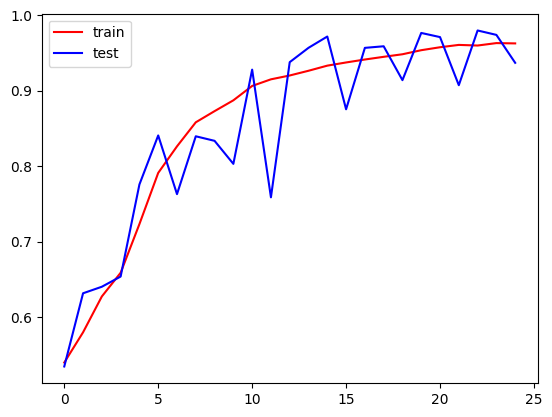

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color="red" ,label="train")
plt.plot(history.history['val_accuracy'] , color="blue", label="test")
plt.legend()
plt.show()

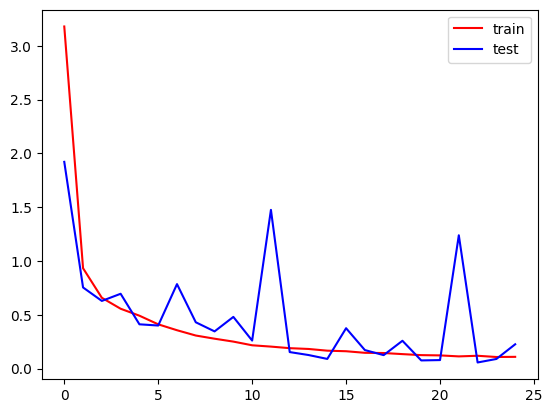

In [12]:
plt.plot(history.history['loss'] , color="red" ,label="train")
plt.plot(history.history['val_loss'] , color="blue", label="test")
plt.legend()
plt.show()

In [13]:
import cv2

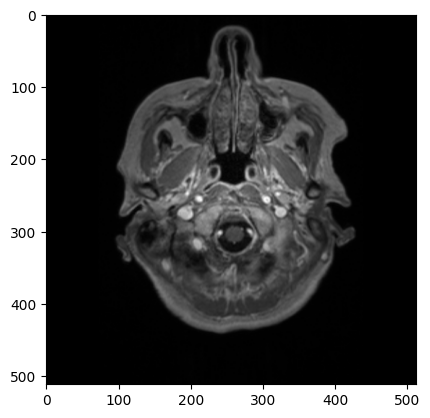

In [24]:
nopd = cv2.imread("/content/0_Subject14__MPR_Thick_Range__002.png")
plt.imshow(nopd)

In [25]:
resized_nopd = cv2.resize(nopd,(256,256))

In [26]:
resized_nopd.shape

(256, 256, 3)

In [27]:
nopd_input = resized_nopd.reshape((1,256,256,3))

In [28]:
model.predict(nopd_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.]], dtype=float32)

In [30]:
## Saving the model with h5 format
h5_model_saved_h5 = model.save('my_model_h5.h5')

In [37]:
model.export("my_model_saved")

Saved artifact at 'my_model_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136581693950608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136579442731216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136579294728032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136579294733488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136579294736656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136579294735072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136579294727328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136579294926048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136579294927280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136579294932560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136579294923936: